# EDA for vehicles dataset

In this notebook, I will perform an exploratory data analysis of used car sales data. I will try to examine what factors can indicate a quick sale of a used car.

## Step 1: imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px



## Step 2: Loading the data set from the file and initial exploration

In [2]:
df = pd.read_csv("../vehicles_us.csv")

In [3]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Step 3: In depth exploration 

* I want to examine the 'date_listed' column and see how it behaves:

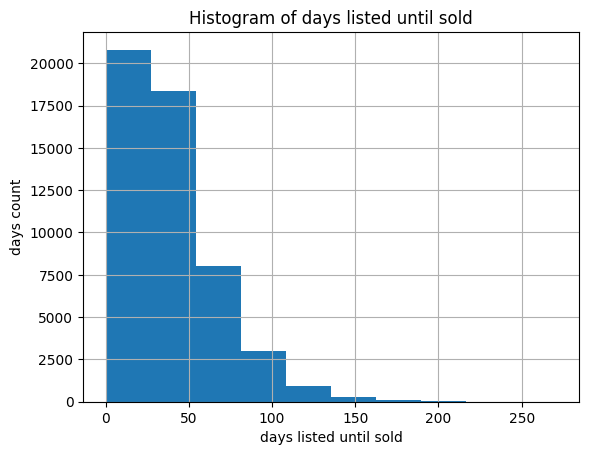

In [5]:
df.days_listed.hist()
ax=plt.gca()
ax.set_xlabel("days listed until sold")
ax.set_ylabel("days count")
ax.set_title("Histogram of days listed until sold")
plt.show()

* As evident from the histogram, the majority of cars are sold within a very short period of time.

* Now, I'd like to take a look at the car color. First, I'll check out the different categories. This is a categorical variable, so I'll use the value_counts function, and of course, I'll also want to count the values where the color is not specified.

In [6]:
df.paint_color.value_counts(dropna =False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

* It's evident that the category of cars listed without a color is the second-largest category. Therefore, it's essential to address it. And I'm curious to examine whether cars with their color specified in the listing sell faster than cars without color information.

In [7]:
color_index=[]
for c in df.paint_color:
    if pd.isna(c):
        color_index.append('no color is listed')
    else:
        color_index.append('a color is listed')
df["color_index"]=color_index

In [8]:
!pip3 show nbformat

Name: nbformat
Version: 5.10.4
Summary: The Jupyter Notebook format
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS

In [9]:
px.histogram(df, x="days_listed", color="color_index", barmode="overlay", histnorm='probability')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': ('color_index=no color is listed' ... 'robability=%{y}<extra></extra>'),
              'legendgroup': 'no color is listed',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'no color is listed',
              'offsetgroup': 'no color is listed',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19,  9, 19, ..., 25, 89, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': ('color_index=a color is listed<' ... 'robability=%{y}<extra></extra>'),
              'legendgroup': 'a color is listed',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'a color is listed',
              'offsetgroup': 'a color is listed',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([50, 79, 28, ..., 22, 32, 71]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'legend': {'title': {'text': 'color_index'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'probability'}}}
})

In [55]:
!pip install --upgrade nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 830.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 2.9 MB/s eta 0:00:00
  Using cached jupyter_core-5.7.2-py3-none-any.whl (28 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl (85 kB)
  Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
  Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [53]:
px.histogram(df, x="days_listed", color="condition", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=good<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 50,  8, ..., 51, 71, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=like new<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'like new',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'like new',
              'offsetgroup': 'like new',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 64, 43, ...,  4, 11, 37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=fair<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'fair',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'fair',
              'offsetgroup': 'fair',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([  9,  50,  49, ...,  25,  56, 158]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=excellent<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'excellent',
              'marker': {'color': '#ab63fa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'excellent',
              'offsetgroup': 'excellent',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([28, 15, 73, ..., 63, 89, 32]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=salvage<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'salvage',
              'marker': {'color': '#FFA15A', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'salvage',
              'offsetgroup': 'salvage',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 23,  19,   9,  33,  39,  12, 113,  22,  17,  71,  61,  38,  44,  28,
                           34,  78,  13,  64,  36,  32,   9,  59,  63,  80,  20,  31,  67,  25,
                           15,  45,  16,  90, 100, 106,  35,  52,  13,  30,  42,  16,  49,  66,
                           27,  33,   7,  12,  51, 134,   4,  12,  28,  36,  49,  30,  39,  34,
                           50,  51,  53,  81,  56,   5,  21,  29,   8,  19,  54,   1,  22,  68,
                           31,  17,  45,  28,  18,  46,  15,  44,  12,  19,  39, 115,  23,  23,
                           18,  47,  72,   8,  52,  18,  96,  61,  21,  72,  44,  39,  24, 100,
                           27,  28,  49,  38,  46,  41,  22,  76,  17,   9,  43,   7,  33,  23,
                            7,  22,  22]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bin

In [22]:
df.condition.value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [23]:
cond_index=[]
for c in df.condition:
    if c in ["excellent", "good", "like new"]:
        cond_index.append(True)
    else:
        cond_index.append(False)
df2=df[cond_index]


In [24]:
px.histogram(df2, x="days_listed", color="condition", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=good<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'good',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'good',
              'offsetgroup': 'good',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 50,  8, ..., 51, 71, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=like new<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'like new',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'like new',
              'offsetgroup': 'like new',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 64, 43, ...,  4, 11, 37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'condition=excellent<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': 'excellent',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'excellent',
              'offsetgroup': 'excellent',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([28, 15, 73, ..., 63, 89, 32]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'legend': {'title': {'text': 'condition'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'probability'}}}
})

In [25]:
trim_date=[]
for d in df.date_posted:
    trim_date.append(d[:-3])
df["trim_date"]=trim_date
df.trim_date.value_counts()

trim_date
2018-10    4643
2018-12    4564
2019-03    4559
2018-05    4503
2018-08    4480
2018-07    4471
2019-01    4452
2018-09    4452
2018-11    4354
2018-06    4216
2019-02    4014
2019-04    2817
Name: count, dtype: int64

In [26]:
date_index=[]
for d in df.trim_date:
    if c in ["2019-04"]:
        date_index.append(False)
    else:
        date_index.append(True)
df3=df[date_index]

In [27]:
px.histogram(df3, x="days_listed", color="trim_date", barmode="overlay", histnorm='probability')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-06<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-06',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-06',
              'offsetgroup': '2018-06',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([19, 15, 40, ..., 63, 11, 10]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-10<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-10',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-10',
              'offsetgroup': '2018-10',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 50,  23, 101, ...,  50, 158,  37]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-02<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-02',
              'marker': {'color': '#00cc96', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-02',
              'offsetgroup': '2019-02',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([79, 17, 20, ..., 25, 61, 73]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-03<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-03',
              'marker': {'color': '#ab63fa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-03',
              'offsetgroup': '2019-03',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 9, 29, 29, ..., 71, 88,  1]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2019-04<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2019-04',
              'marker': {'color': '#FFA15A', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2019-04',
              'offsetgroup': '2019-04',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([ 28,  37,  13, ..., 175,  25,  44]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=2018-12<br>days_listed=%{x}<br>probability=%{y}<extra></extra>',
              'legendgroup': '2018-12',
              'marker': {'color': '#19d3f3', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': '2018-12',
              'offsetgroup': '2018-12',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([73, 13, 31, ..., 63, 12,  4]),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histnorm': 'probability',
              'hovertemplate': 'trim_date=201

In [28]:

px.scatter(df, x='days_listed', y='price')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'days_listed=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([19, 50, 79, ..., 32, 71, 10]),
              'xaxis': 'x',
              'y': array([ 9400, 25500,  5500, ...,  3950,  7455,  6300]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})

In [29]:
res_price=[]
for p in df.price:
    if p>150000:
        res_price.append(False)
    else:
        res_price.append(True)

df4=df[res_price]

In [33]:
px.scatter(df4, x='days_listed', y='price', opacity=0.01)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'days_listed=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'opacity': 0.01, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array([19, 50, 79, ..., 32, 71, 10]),
              'xaxis': 'x',
              'y': array([ 9400, 25500,  5500, ...,  3950,  7455,  6300]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'days_listed'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})